# Apparent Temperature Analysis

It makes sesnse, with all the factors that affect our comfort levels, that there is a difference with the actual measured temperature and the temperature that is percieved by humans. The question is, how much do the different components affect this apparent temperature? 

To explore this relationship, we will perform a linear regression with multiple features. Linear Regression is one of the most fundamental statistical learning tool that it is cruicial for any type of analyst to know.

Data was downloaded from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/data)

In [1]:
#!kaggle datasets download -d budincsevity/szeged-weather -w

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
#!ls

szeged-weather.zip  Untitled.ipynb  weatherHistory.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weatherHistory.csv')

## Initial Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [6]:
data['Formatted Date'].min(),data['Formatted Date'].max()

(Timestamp('2005-12-31 23:00:00'), Timestamp('2016-12-31 22:00:00'))

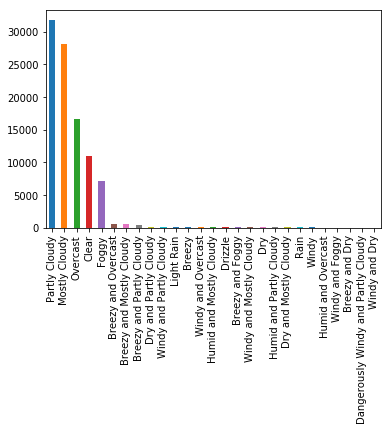

In [7]:
data['Summary'].value_counts().plot(kind='bar')

In [8]:
data['Daily Summary'].value_counts().head(20)

Mostly cloudy throughout the day.                                    20085
Partly cloudy throughout the day.                                     9981
Partly cloudy until night.                                            6169
Partly cloudy starting in the morning.                                5184
Foggy in the morning.                                                 4201
Foggy starting overnight continuing until morning.                    3576
Partly cloudy until evening.                                          3288
Mostly cloudy until night.                                            3095
Overcast throughout the day.                                          2952
Partly cloudy starting in the morning continuing until evening.       2806
Foggy until morning.                                                  2691
Partly cloudy starting in the morning continuing until night.         2136
Mostly cloudy starting in the morning.                                1584
Foggy starting in the eve

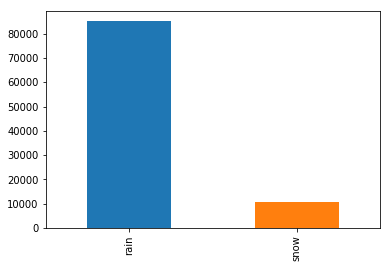

In [9]:
data['Precip Type'].value_counts().plot(kind='bar')


In [10]:

to_plot = ['Precip Type','Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']
data.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

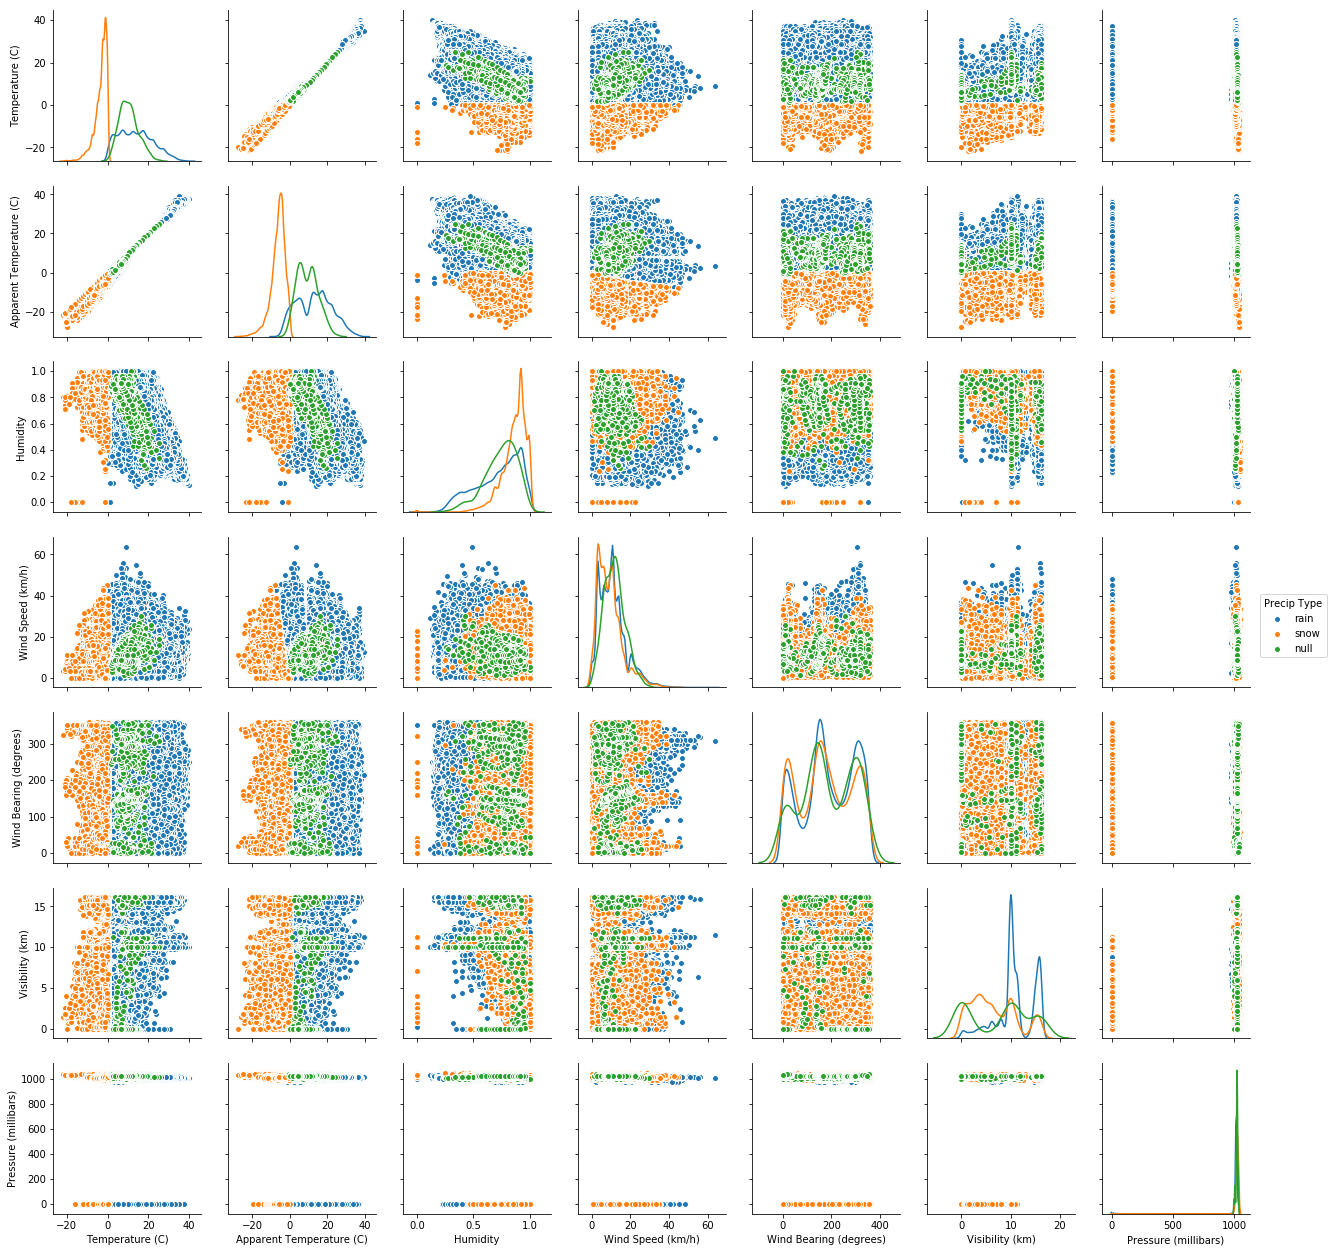

In [11]:
sns.pairplot(data[to_plot].fillna('null'),hue = 'Precip Type',diag_kind='kde') #filled null so we can visualize it in the pairplot

## Observations

- Precipitate types are highly differentiable from one another (good clusters)
- Strong positive linear relationship between Temperature and Apparent Temperature as expected.
- When looking at observations of no precipitate, there is a negative relationship
- Wind Speed seems to have a slightly positive relationship with Apparent Temperature

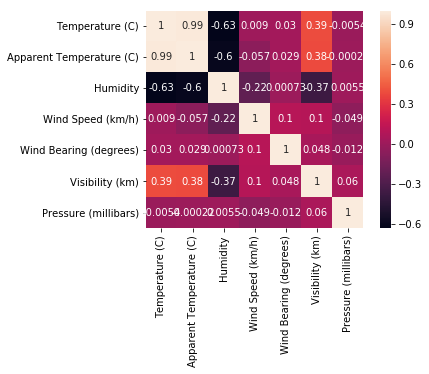

In [12]:
corr = data.drop('Loud Cover', axis=1).corr() # dropping Loud Cover because it never change
sns.heatmap(corr, square=True,annot = True);

## Preprocessing

In [13]:
final_df = pd.concat([data ,pd.get_dummies(data['Precip Type'],dummy_na = True)], axis = 1)

In [14]:
final_df.columns

Index([          'Formatted Date',                  'Summary',
                    'Precip Type',          'Temperature (C)',
       'Apparent Temperature (C)',                 'Humidity',
              'Wind Speed (km/h)',   'Wind Bearing (degrees)',
                'Visibility (km)',               'Loud Cover',
           'Pressure (millibars)',            'Daily Summary',
                           'rain',                     'snow',
                              nan],
      dtype='object')

## Model Building

In [15]:
features = ['Temperature (C)',
                       'Humidity',
              'Wind Speed (km/h)',   'Wind Bearing (degrees)',
                'Visibility (km)',               
           'Pressure (millibars)', 
                           'rain',                     'snow',
                              np.nan]
X = final_df[features]
y = final_df['Apparent Temperature (C)']

In [16]:
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 0)


reg = Ridge(alpha=.3).fit(X_train,y_train)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.sqrt(mean_squared_error(y_test,y_pred)), r2_score(y_test,y_pred)



(1.0710651605175099, 0.9899114285956024)

In [19]:
pd.DataFrame(list(zip(X_test.columns,reg.coef_)),columns = ['feature','coef']).head(20)

,feature,coef
0,Temperature (C),1.115500
1,Humidity,0.823498
2,Wind Speed (km/h),-0.097955
3,Wind Bearing (degrees),0.000508
4,Visibility (km),-0.005362
5,Pressure (millibars),0.000232
6,rain,0.034218
7,snow,-0.419356
8,NaN,0.385138


## Interpretation

One of the main benefits of Regression analysis is that the results are very easy to interpret. Not like other machine learning methods, linear regression spits out coefficients that can easily be explained even to those who are not statistically savy.


Based on the results above, apparent temperature is very highly correlated with actual Temperature (Who knew!?). What is more interesting are the effects of the other variables.

For every unit increase of humidity, Apparent temperature is expected to increase by about .8 degrees.

The coefficients produced seem to pass the common sense check i.e apparent temperature decreasing per increase of wind speed and a decrease if it is snowing or not, but this does not prove causality